<a href="https://colab.research.google.com/github/ertimas/DeepSigRadioML2018_Notebook/blob/main/DeepSigRadioML2018_01A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle
Kaggle hosts the DeepSig RadioML dataset!  It is about 20GB.  Rather than using Colab's upload capability, we will pull it in directly.  The following uses the `opendatasets` module to download it directly from Kaggle. To run this section of code go to Kaggle, click your Profile icon >

In [ ]:
!pip install opendatasets
import opendatasets as od
import os

'''Flags determining if we move the dataset or not'''
FLAG_MV_DEEPSIG_DATASET=None
FLAG_MV_RADIOML_DATASET=None










'''Check if the dataset is downloaded and avoid that time suck'''
try:
  os.stat('/content/sample_data/deepsigio-radioml-201801a-new')
  FLAG_MV_DEEPSIG_DATASET=False
  print('FILE EXISTS\t\t/content/sample_data/deepsigio-radioml-201801a-new')
except FileNotFoundError as e:
  try:
    os.stat('/content/deepsigio-radioml-201801a-new')
    FLAG_MV_DEEPSIG_DATASET=True
    print('FILE EXISTS\t\t/content/deepsigio-radioml-201801a-new')
  except FileNotFoundError as e:
    print('Downloading deepsigio-radioml-201801a-new')
    od.download("https://www.kaggle.com/datasets/aleksandrdubrovin/deepsigio-radioml-201801a-new")
    FLAG_MV_DEEPSIG_DATASET=True


'''Move the data to another folder that hopefully isn't deleted'''
try:
  if FLAG_MV_DEEPSIG_DATASET:
    os.rename('/content/deepsigio-radioml-201801a-new', '/content/sample_data/deepsigio-radioml-201801a-new')
    print('MOVED\t\t/content/deepsigio-radioml-201801a-new\tto\t/content/sample_data/deepsigio-radioml-201801a-new')
except OSError as e:
  print('All good, already have deepsigio-radioml-201801a-new')










'''Check if the dataset is downloaded and avoid that time suck'''
try:
  os.stat('/content/sample_data/radioml2018')
  FLAG_MV_RADIOML_DATASET=False
  print('FILE EXISTS\t\t/content/sample_data/radioml2018')
except FileNotFoundError as e:
  try:
    os.stat('/content/radioml2018')
    print('FILE EXISTS\t\t/content/radioml2018')
    FLAG_MV_RADIOML_DATASET=True
  except FileNotFoundError as e:
    print('Downloading radioml2018')
    od.download('https://www.kaggle.com/datasets/pinxau1000/radioml2018')
    FLAG_MV_RADIOML_DATASET=True


'''Move the data to another folder that hopefully isn't deleted'''
try:
  if FLAG_MV_RADIOML_DATASET:
    os.rename('/content/radioml2018', '/content/sample_data/radioml2018')
    print('MOVED\t\t/content/radioml2018\tto\t/content/sample_data/radioml2018')
except OSError as e:
  print('All good, already have deepsigio-radioml-201801a-new')









H5_path = '/content/sample_data/deepsigio-radioml-201801a-new/'
H5_dataset = '/content/sample_data/deepsigio-radioml-201801a-new/model_full_SNR.h5'
HDF5_path = '/content/sample_data/radioml2018/'
HDF5_dataset='/content/sample_data/radioml2018/GOLD_XYZ_OSC.0001_1024.hdf5'

FILE EXISTS		/content/sample_data/deepsigio-radioml-201801a-new
FILE EXISTS		/content/sample_data/radioml2018


## Follow pinxau1000's [Getting Started](https://www.kaggle.com/code/pinxau1000/radioml2018-01a-get-started) tutorial

It's an easy intro to the dataset, in the format that DeepSig hosts it in.  The h5 format found later in this notebook is different and not a direct conversion.

Retrieving Sample 0
	- Modulation (raw): [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
	- Modulation: OOK
	- SNR: [-20]
	- Samples: [[ 0.0420274   0.23476323]
 [-0.2728826   0.40513492]
 [-0.26707262  0.22749889]
 ...
 [-0.7055947  -0.28693035]
 [-0.41157472  0.66826206]
 [ 0.06487698  0.6358149 ]]


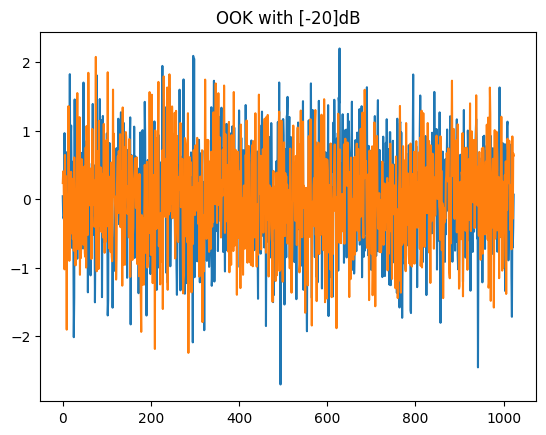

In [ ]:
import h5py
import json
from numpy import argwhere

# Open the dataset
hdf5_file = h5py.File(HDF5_dataset,  'r')
# Load the modulation classes. You can also copy and paste the content of classes-fixed.txt.
modulation_classes = json.load(open(HDF5_path+ 'classes-fixed.json', 'r'))

# Read the HDF5 groups
data = hdf5_file['X']
modulation_onehot = hdf5_file['Y']
snr = hdf5_file['Z']

# Sets the frame number
idx = 0

# Converts the onehot encoded modulation to a readable string
modulation_str = modulation_classes[int(argwhere(modulation_onehot[idx] == 1))]



# Prints info about the frame
print(f"Retrieving Sample {idx}\n"
      f"\t- Modulation (raw): {modulation_onehot[idx]}\n"
      f"\t- Modulation: {modulation_str}\n"
      f"\t- SNR: {snr[idx]}\n"
      f"\t- Samples: {data[idx]}")

from matplotlib import pyplot as plt

# Plot IQ samples of the frame
plt.figure()
plt.title(f"{modulation_str} with {snr[idx]}dB")
plt.plot(data[idx])
plt.show()



# Closes the file
hdf5_file.close()



## Create some helper functions

Used to manipulate the data in a way that makes sense to me.

In [28]:
def get_hdf5_dataset(filename:str, filepath:str):
  """
  @brief from the hdf5 dataset return attributes for processing
  @return classes class names of the signals
  @return snrs signal-to-noise ratios of the samples
  @return samples the I/Q samples of the data.
  @return
  """

  # Open the dataset
  hdf5_file = h5py.File(filename, 'r')
  # Load the modulation classes. You can also copy and paste the content of
  # classes-fixed.txt.

  classes = json.load(open(f'{HDF5_path}/classes-fixed.json','r'))

  # Read the HDF5 groups
  samples = hdf5_file['X']
  labels = hdf5_file['Y']
  snrs = hdf5_file['Z']
  return classes, snrs, samples, labels




def get_h5_dataset(filename:str, filepath:str):
  """
  @brief load the classes, snrs, and samples
  """
  import numpy as np
  labels = np.load(filepath + 'labels.npy', mmap_mode = 'r')
  snrs = np.load(filepath + 'snrs.npy', mmap_mode = 'r')
  samples = np.load(filepath + 'signals.npy', mmap_mode = 'r')

  classes = ''
  with open(f'{H5_path}/classes.txt') as fin:
    classes = fin.read().replace('\n','').replace('classes = ','')
    # for l in fin.readline():
    #   classes += l.replace('\n','').replace('classes = ','')

  return classes, snrs, samples, labels



def print_sample_details(classes:list, snrs:list, samples:list):
  """
  @brief for every class, print the class name, the number of samples, the
  @return None
  """
  for idx in range(len(classes)):
    # Prints info about the frame
    print(f"Retrieving Sample {idx}\n"
      f"\t- Modulation: {classes[idx]}\n"
      f"\t- SNR: {snrs[idx]}\n"
      f"\t- Samples: {samples[idx]}")

# Examples:
# classes, snrs, samples, labels = get_hdf5_dataset(HDF5_dataset, HDF5_path)
# print_sample_details(classes, snrs, samples)
classes, snrs, samples, labels = get_h5_dataset(H5_dataset, H5_path)
# print_sample_details(classes, snrs, samples)
print(classes)
print(type(classes) + ' ' + len(classes))

['32PSK', '16APSK', '32QAM', 'FM', 'GMSK', '32APSK', 'OQPSK', '8ASK', 'BPSK', '8PSK', 'AM-SSB-SC', '4ASK', '16PSK', '64APSK', '128QAM', '128APSK', 'AM-DSB-SC', 'AM-SSB-WC', '64QAM', 'QPSK', '256QAM', 'AM-DSB-WC', 'OOK', '16QAM']


## Building a ResNet
Thanks for [this tutorial](https://www.kaggle.com/code/aleksandrdubrovin/resnet-model-for-radio-signals-classification) Alex.
